<a id='top'></a>

# CSCI3022 F21
# Homework 1: Measures of Centrality and Dispersion
***

**Name**: Nathan Shaver

***

This assignment is due on Canvas by **MIDNIGHT on Tuesday, September 7**. (NB: most HW will be due on Mondays, but due to Labor Day this is one day later).  Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math
%matplotlib inline

[Back to top](#top)
<a/ id='p1'></a>

## (10 pts) Problem 1:Theory (The Minimal Median)
***

One way we conceptualize many data science questions is asking for the "best choice" of some parameter on data set.  We should be able to justify that our measures of centrality should in some way be the "best" ways to represent the data.


In lecture, we may have discussed the following important property of the mean:


The *sample mean* of data $X_1, X_2, \dots X_n$ is the unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n \left(X_i-c \right)^2. $$

The proof of that claim is as follows:

**Proof:**

Differentiating yields
$$f'(c)=\frac{df}{dc}\sum_{i=1}^n \left(X_i-c \right)^2 =\sum_{i=1}^n-2(X_i-c).$$ 

Setting $f'(c)=0$ gives

$$0=\sum_{i=1}^n-2(X_i-c)$$
$$=2nc-2\sum_{i=1}^n X_i$$
$$\implies\qquad  c=\frac{\sum_{i=1}^n X_i}{n}=\bar{X}$$

***

### Your exercise:

You are tasked with recreating a *similar* proof.  Prove the following:

The *median* of data $X_1, X_2, \dots X_n$ is the possibly non-unique minimizer $c$ of the function $$f(c)=\sum_{i=1}^n |X_i-c| $$

A few things to think about and **include in your solution**:

 - how do we differentiate the absolute value function?
 - what conditions might make the median non-unique in this case?  If it's nonunique, what possible values of $c$ still minimize the function $f$?  This about both how this process looks with different numbers of total points $n$ and if data values are possible identical/repeated.

**Typeset your response here**

Expanding the sum results in this formula:

$$\frac{d}{dc}  (X_1-c)^2 + (X_2-c)^2 + (X_3 - c)^2 + ... + (X_n-c)^2 $$

Since we are taking the derivative with respect to c, this formula is an upward opening parabola. This means that there is only one critical point, the vertex, which is the minimum due to it being an upward opening parabola. Taking the derivative to find that vertex results in this formula:

$$\sum_{i=1}^n -2(X_i-c)$$

To calculate the vertex, we set this derivative equal to 0 and solve for c:

$$0 = \sum_{i = 1}^n -2(X_i-c)$$

$$0 = \sum_{i = 1}^n (X_i-c)$$

$$0 = \sum_{i = 1}^n X_i + \sum_{i = 1}^n -c$$

$$0 = \sum_{i = 1}^n X_i -cn$$

$$cn = \sum_{i = 1}^n X_i$$

$$c = \frac{\sum_{i = 1}^n X_i}{n}$$

C is now equal to the minimum of the parabola of this function, which is equvilant to the unique minimizer, or the median.

[Back to top](#top)
<a/ id='p2'></a>

## (15 pts) Problem 2: Theory and Computation (Scaling)
***
Consider the following 3 data sets:

`A=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]`

`B=[112,0,0,12,7,18,0,25,0,13,0,35]`

`C` is the random data set generated by using `np.random.gamma(5,1.5,size=37)`

For each data set, perform the following operations:

**Part A:** Compute and print the mean and standard deviation of the data set.

In [2]:
#function that returns the mean of a list
def mean(totalList, totalLength):
    i = 0
    totalMean = 0
    totalSum = 0
    while i < totalLength:
        totalSum += totalList[i]
        i = i + 1
    totalMean = totalSum / totalLength
    return(totalMean)

#function that returns the standard deviation of a list
def standardDev(totalList, totalMean, totalLength):
    i = 0
    finalSD = 0
    newfinalSD = 0
    sqrDis = 0
    while i < totalLength:
        sqrDis += (totalList[i] - totalMean) ** 2
        i = i + 1
    finalSD = sqrDis / totalLength
    newfinalSD = finalSD ** .5 
    return(newfinalSD)

#the lists
A=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
B=[112,0,0,12,7,18,0,25,0,13,0,35]
C=np.random.gamma(5,1.5,size=37)

#getting the length of the lists
lengthA = len(A)
lengthB = len(B)
lengthC = len(C)

#storing the means of the lists
meanA = mean(A, lengthA)
meanB = mean(B, lengthB)
meanC = mean(C, lengthC)

#storing the standard deviations of the lists
standDevA = standardDev(A, meanA, lengthA)
standDevB = standardDev(B, meanB, lengthB)
standDevC = standardDev(C, meanC, lengthC)

#printing out the final statements
print("The mean and standard deviation of A are: ")
print(meanA, standDevA)
print("The mean and standard deviation of B are: ",)
print(meanB, standDevB)
print("The mean and standard deviation of C are: ")
print(meanC, standDevC)

The mean and standard deviation of A are: 
7.5 4.6097722286464435
The mean and standard deviation of B are: 
18.5 30.2393231846658
The mean and standard deviation of C are: 
7.664227451981055 2.945234448666062


**Part B:** Plot frequency histograms of each data set, with the 3 plots stacked vertically (one on top of the other).

Text(0, 0.5, 'Quantity')

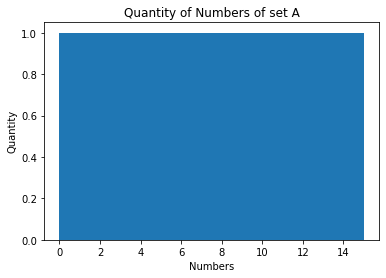

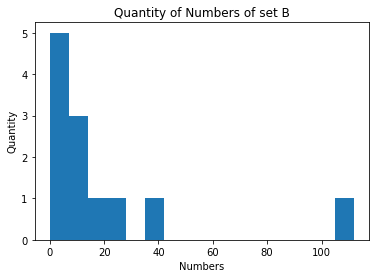

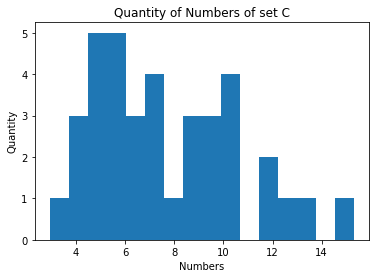

In [3]:
#histogram of list A
fig, ax = plt.subplots(1,1)
ax.hist(A, bins = 16)
ax.set_title("Quantity of Numbers of set A")
ax.set_xlabel("Numbers")
ax.set_ylabel("Quantity")

#histogram of list B
fig, ax = plt.subplots(1,1)
ax.hist(B, bins = 16)
ax.set_title("Quantity of Numbers of set B")
ax.set_xlabel("Numbers")
ax.set_ylabel("Quantity")

#histogram of list C
fig, ax = plt.subplots(1,1)
ax.hist(C, bins = 16)
ax.set_title("Quantity of Numbers of set C")
ax.set_xlabel("Numbers")
ax.set_ylabel("Quantity")


**Part C:** Form 3 new data sets, $A^*$, $B^*$, and $C^*$.  Create each by subtracting the original means of A, B, and C from each observation in that data set. Compute and print the means and standard deviations of the new data sets.

In [4]:
#function that subtracts the original mean of each index of the old list and stores in a new list
def subMean(oldList, finalMean, totalLength):
    i = 0
    newList = []
    while i < totalLength:
        newList.append(oldList[i] - finalMean)
        i = i + 1
    return(newList)

#function that returns the mean of a list
def mean(totalList, totalLength):
    i = 0
    totalMean = 0
    totalSum = 0
    while i < totalLength:
        totalSum += totalList[i]
        i = i + 1
    totalMean = totalSum / totalLength
    return(totalMean)

#function that returns the standard deviation of a list
def standardDev(totalList, totalMean, totalLength):
    i = 0
    finalSD = 0
    newfinalSD = 0
    sqrDis = 0
    while i < totalLength:
        sqrDis += (totalList[i] - totalMean) ** 2
        i = i + 1
    finalSD = sqrDis / totalLength
    newfinalSD = finalSD ** .5 
    return(newfinalSD)

#storing the old means
meanA = mean(A, lengthA)
meanB = mean(B, lengthB)
meanC = mean(C, lengthC)

#storing a new list where the old means are subtracted
subMeanA = subMean(A, meanA, lengthA)
subMeanB = subMean(B, meanB, lengthB)
subMeanC = subMean(C, meanC, lengthC)

#storing the new means
newMeanA = mean(subMeanA, lengthA)
newMeanB = mean(subMeanB, lengthB)
newMeanC = mean(subMeanC, lengthC)

#storing the new standard deviations
newStandDevA = standardDev(subMeanA, newMeanA, lengthA)
newStandDevB = standardDev(subMeanB, newMeanB, lengthB)
newStandDevC = standardDev(subMeanC, newMeanC, lengthC)

#printing out the final statements
print("The mean and standard deviation of A* are: ")
print(newMeanA, newStandDevA)
print("The mean and standard deviation of B* are: ")
print(newMeanB, newStandDevB)
print("The mean and standard deviation of C* are: ")
print(newMeanC, newStandDevC)

The mean and standard deviation of A* are: 
0.0 4.6097722286464435
The mean and standard deviation of B* are: 
0.0 30.2393231846658
The mean and standard deviation of C* are: 
-1.4162845070893888e-15 2.9452344486660618


**Part D:** Form 3 new data sets, $\tilde{A}$, $\tilde{B}$, and $\tilde{C}$.  Create each by subtracting the original means of A, B, and C from each observation in that data set and then dividing by the original standard deviation.  Compute and print the means and standard deviations of the new data sets.

In [5]:
#function that subtracts the original mean and divides by the original standard deviation and returns in a new list
def subMeanSD(oldList, finalMean, totalLength, origSD):
    i = 0
    newList = []
    while i < totalLength:
        newList.append((oldList[i] - finalMean)/origSD)
        i = i + 1
    return(newList)

#function that calculates the mean of a list
def mean(totalList, totalLength):
    i = 0
    totalMean = 0
    totalSum = 0
    while i < totalLength:
        totalSum += totalList[i]
        i = i + 1
    totalMean = totalSum / totalLength
    return(totalMean)

#function that calculates the standard deviation of a list
def standardDev(totalList, totalMean, totalLength):
    i = 0
    finalSD = 0
    newfinalSD = 0
    sqrDis = 0
    while i < totalLength:
        sqrDis += (totalList[i] - totalMean) ** 2
        i = i + 1
    finalSD = sqrDis / totalLength
    newfinalSD = finalSD ** .5 
    return(newfinalSD)

#storing the old means
meanA = mean(A, lengthA)
meanB = mean(B, lengthB)
meanC = mean(C, lengthC)

#storing the old standard deviations
standDevA = standardDev(A, meanA, lengthA)
standDevB = standardDev(B, meanB, lengthB)
standDevC = standardDev(C, meanC, lengthC)

#storing the new list with subtracted means and divided standard deviations
subMeanA = subMeanSD(A, meanA, lengthA, standDevA)
subMeanB = subMeanSD(B, meanB, lengthB, standDevB)
subMeanC = subMeanSD(C, meanC, lengthC, standDevC)

#storing the new means
newMeanA = mean(subMeanA, lengthA)
newMeanB = mean(subMeanB, lengthB)
newMeanC = mean(subMeanC, lengthC)

#storing the new standard deviation
newStandDevA = standardDev(subMeanA, newMeanA, lengthA)
newStandDevB = standardDev(subMeanB, newMeanB, lengthB)
newStandDevC = standardDev(subMeanC, newMeanC, lengthC)

#final print statements
print("The mean and standard deviation of A* are: ")
print(newMeanA, newStandDevA)
print("The mean and standard deviation of B* are: ")
print(newMeanB, newStandDevB)
print("The mean and standard deviation of C* are: ")
print(newMeanC, newStandDevC)

The mean and standard deviation of A* are: 
4.163336342344337e-17 1.0
The mean and standard deviation of B* are: 
-9.25185853854297e-18 1.0000000000000002
The mean and standard deviation of C* are: 
-5.071018680044634e-16 0.9999999999999999


**Part E:** Plot density histograms of each $\tilde{A}$, $\tilde{B}$, and $\tilde{C}$, with the 3 plots stacked vertically (one on top of the other).  Ensure that each plot has the same horizontal axis.  

Text(0, 0.5, 'Density')

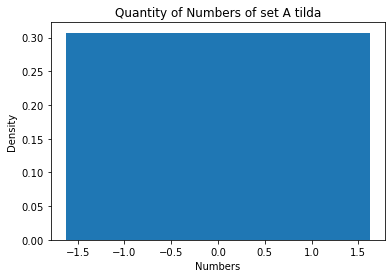

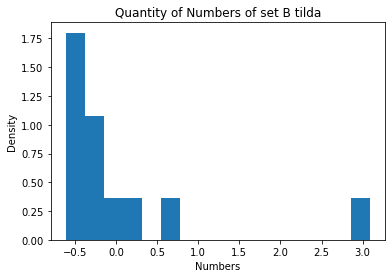

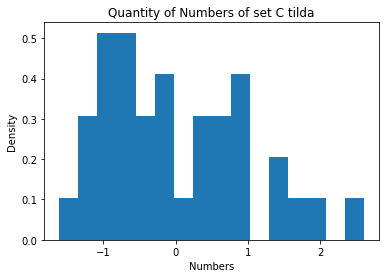

In [6]:
import matplotlib.pyplot as plt

#density histogram of A tilda
fig, ax = plt.subplots(1,1)
ax.hist(subMeanA, bins = 16, density = True)
ax.set_title("Quantity of Numbers of set A tilda")
ax.set_xlabel("Numbers")
ax.set_ylabel("Density")

#density histogram of B tilda
fig, ax = plt.subplots(1,1)
ax.hist(subMeanB, bins = 16, density = True)
ax.set_title("Quantity of Numbers of set B tilda")
ax.set_xlabel("Numbers")
ax.set_ylabel("Density")

#density histogram of C tilda
fig, ax = plt.subplots(1,1)
ax.hist(subMeanC, bins = 16, density = True)
ax.set_title("Quantity of Numbers of set C tilda")
ax.set_xlabel("Numbers")
ax.set_ylabel("Density")


**Part F:** Why might the result in part D matter?

All sets, A*, B* and C* have means of 0 and standard deviations of 1. This proves that no matter the set, every single data point is one mean away from the standard deviation. This menas that the graph follows a standard bell curve and has a normal distribution. 

**Part G:** Looking at each of the 3 original data sets, come up with a real-world context where those numbers might make for reasonable observations.

A real world context for these lists and histograms could be the number of times 3 groups of employees come in to the office to work during the month of March. These numbers all range between 0 and 35, which makes sense as some employees might come in twice in a day. The except is the 112 in data set B, which is an outlier and can be attributed to a mistake in documentation. 

[Back to top](#top)
<a/ id='p3'></a>

## (20 pts) Problem 3: Practice (Titanic)
*** 
The sinking of the RMS Titanic was a terrible tragedy that saw the loss of many lives. Even within this tragedy, thanks to the combinations of the records of the White Star Line and the thorough nature of follow-up research after the accident we have some records that can help us try to piece together the course of events on board the ship. Many of the historians and other researchers who have investigated this event have speculated as to what exactly happened.

We have the data on survival rates by class, gender, and age, so let's figure out whether there is evidence for some of these scenarios. Access the Titanic data in `titanic_data.csv` and store it in a Pandas DataFrame. The data contains information pertaining to class status (**Pclass**), survival (**Survived**), and gender (**Sex**) of passengers, among other things. Be sure to use the `titanic_data.csv` data set, *not* the `clean_titanic_data` file or `dirty_titanic_data` file from the in-class notebook exercises.

In [7]:
filepath = '/home/jovyan/3022/hw/hw1/titanic_data.csv'
df = pd.read_csv(filepath)

#testing to see if file path works
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,36.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,18.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,14.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,27.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,63.0,0,0,373450,8.0500,NaN,S


**Part A**:
Based on the overall population of passengers, report the proportion that survived.

$$P(Survived=1)$$

In [8]:
people_survived = df["Survived"].sum()
length = len(df)
people_survived_proportion = people_survived / length
print("Out of a total of", length, "passengers,", people_survived, "passengers or", people_survived_proportion, "percent survived")

Out of a total of 891 passengers, 350 passengers or 0.39281705948372614 percent survived


**Part B**: 
Some claim that the final hours aboard the RMS Titanic were marked by "class warfare" in which the people with first-class tickets took all the good spots on the lifeboats; others claim that the final hours were characterized by male chivalry, in which the men valiantly gave up their positions in the boats and succumbed bravely to the depths of the Atlantic. 

Consider the two claims: class warfare, and male chivalry. Suppose that class warfare occurred in the final hours aboard the Titanic.  What patterns might you expect to see in the data?  Suppose that male chivalry was widespread during the final hours instead. What patterns might you then expect to see in the data?  Explain both of these hypothesized patterns in words. Are these two hypotheses mutually exclusive or not?


**Part B Answer:**

Let's say the data is presented in a density histogram, with each histogram bar representing 1st class, 2nd class, etc. The y axis is the percentage of passengers that survived by class, with 1.0 being the maximum. If class warfare occured on the titanic, the data would have a left skew towards the higher class passengers, because more of them would have survived. A similar density histogram of men and women who survived would have a female skew if male chivalry occured. These two patterns are not mutually exclusive since there are many male first class passengers on the passenger list



**Part C**: Use Pandas methods to create a clean data set by removing any rows from the DataFrame that are missing values corresponding to **Survived**, **Pclass**, **Age**, or **Sex**. Store the clean data in a DataFrame called dfTitanic. Be sure to show any exploratory work determining if/where there are rows with missing values. _HINT: There should be 714 rows in your cleaned data set._

In [9]:
#removing any blank survived, pclass, sex and age cells
dfTitanic = df.dropna(subset = ['Survived', 'Pclass', 'Sex', 'Age'])
dfTitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,444.254902,0.390756,2.326331,29.699118,0.521008,0.380952,31.235882
std,256.841156,0.488262,0.831502,14.526497,1.104742,0.801805,48.602792
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,220.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.925000
50%,441.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.750000,1.000000,3.000000,38.000000,1.000000,0.000000,31.275000
max,889.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Part D**: Compute the probability of survival of both men and women.  Then, compute the probability of survival of passengers in each of the 3 passenger classes.  Finally, compute the probabilities of survival and men and women *within* each passenger class (all 6 subsets).  Then, answer the following questions:
* **(i)** When reviewing class survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(ii)** When reviewing gender survival probability, how do the results compare to the base survival probability results from **Part A**?
* **(iii)** Within each passenger class, were men or women more/less/equally likely to survive?
* **(iv)**  Did men in first class or women in third class have a higher survival probability?


In [10]:
#store the total number of male/female survivors
maleSurv = np.sum(dfTitanic.loc[dfTitanic['Sex'] == 'male', 'Survived'])
femaleSurv = np.sum(dfTitanic.loc[dfTitanic['Sex'] == 'female', 'Survived'])
#store the total number of male/female passengers
total_male = len(dfTitanic[dfTitanic['Sex'] == 'male'])
total_female = len(dfTitanic[dfTitanic['Sex'] == 'female'])
#store the probability of survivale for male/female
probability_male = maleSurv / total_male
probability_female = femaleSurv / total_female

#final print statement
print("The probability of survival for men was {}".format(probability_male))
print("The probability of survival for women was {}".format(probability_female))
print("\n")
#store the total number of 1st/2nd/3rd class survivors
firstclassSurv = np.sum(dfTitanic.loc[dfTitanic['Pclass'] == 1, 'Survived'])
secondclassSurv = np.sum(dfTitanic.loc[dfTitanic['Pclass'] == 2, 'Survived'])
thirdclassSurv = np.sum(dfTitanic.loc[dfTitanic['Pclass'] == 3, 'Survived'])
#store the total number of 1st/2nd/3rd class passengers
totalFirst = len(dfTitanic[dfTitanic['Pclass'] == 1])
totalSecond = len(dfTitanic[dfTitanic['Pclass'] == 2])
totalThird = len(dfTitanic[dfTitanic['Pclass'] == 3])
#store the probability of survival for 1st/2nd/3rd
probability_first = firstclassSurv / totalFirst
probability_second = secondclassSurv / totalSecond
probability_third = thirdclassSurv / totalThird

#final print statement
print("The probability of survival for 1st class passengers was {}".format(probability_first))
print("The probability of survival for 2nd class passengers was {}".format(probability_second))
print("The probability of survival for 3rd class passengers was {}".format(probability_third))
print("\n")

#store the number of first class male passengers
temp1 =(dfTitanic.loc[(dfTitanic['Pclass'] == 1)&( dfTitanic['Sex'] == 'male')])
#store the number of first class male survivors
menFirstSurv = np.sum(temp1['Survived'])
#process repeated for female and 2nd and 3rd class
temp2 =(dfTitanic.loc[(dfTitanic['Pclass'] == 2)&( dfTitanic['Sex'] == 'male')])
menSecondSurv = np.sum(temp2['Survived'])
temp3 =(dfTitanic.loc[(dfTitanic['Pclass'] == 3)&( dfTitanic['Sex'] == 'male')])
menThirdSurv = np.sum(temp3['Survived'])
temp4 =(dfTitanic.loc[(dfTitanic['Pclass'] == 1)&( dfTitanic['Sex'] == 'female')])
womenFirstSurv = np.sum(temp4['Survived'])
temp5 =(dfTitanic.loc[(dfTitanic['Pclass'] == 2)&( dfTitanic['Sex'] == 'female')])
womenSecondSurv = np.sum(temp5['Survived'])
temp6 =(dfTitanic.loc[(dfTitanic['Pclass'] == 3)&( dfTitanic['Sex'] == 'female')])
womenThirdSurv = np.sum(temp6['Survived'])

#store the probability of survival for each sex and class
probability_firstM = menFirstSurv / totalFirst
probability_secondM = menSecondSurv / totalSecond
probability_thirdM = menThirdSurv / totalThird
probability_firstF = womenFirstSurv / totalFirst
probability_secondF = womenSecondSurv / totalSecond
probability_thirdF = womenThirdSurv / totalThird

#final print statement
print("The probability of survival for male 1st class passengers was {}".format(probability_firstM))
print("The probability of survival for male 2nd class passengers was {}".format(probability_secondM))
print("The probability of survival for male 3rd class passengers was {}".format(probability_thirdM))
print("The probability of survival for female 1st class passengers was {}".format(probability_firstF))
print("The probability of survival for female 2nd class passengers was {}".format(probability_secondF))
print("The probability of survival for female 3rd class passengers was {}".format(probability_thirdF))

The probability of survival for men was 0.19654427645788336
The probability of survival for women was 0.749003984063745


The probability of survival for 1st class passengers was 0.6428571428571429
The probability of survival for 2nd class passengers was 0.4827586206896552
The probability of survival for 3rd class passengers was 0.2518703241895262


The probability of survival for male 1st class passengers was 0.21428571428571427
The probability of survival for male 2nd class passengers was 0.1103448275862069
The probability of survival for male 3rd class passengers was 0.09725685785536159
The probability of survival for female 1st class passengers was 0.42857142857142855
The probability of survival for female 2nd class passengers was 0.3724137931034483
The probability of survival for female 3rd class passengers was 0.1546134663341646


**Part D Answer:**

**(i):**
The overall survival rate was roughly .39. The 1st class survival rate (.64) was signficantly higher than the overal average. The 2nd class survival rate (.48) was slightly higher than the overall average. The 3rd class survival rate (.25) was lower than the overal survival rate

**(ii):**
The overal survival rate was roughly .39. The male survival rate (.19) was lower than the overall average. On the other hand, the female survival rate (.75) was signficantly higher than the overal average

**(iii):**
Within every single passenger class, women were more likely to survive than men.

1st: Female(.43) > Male(.21)

2nd: Female(.37) > Male(.11)

3rd: Female(.15) > Male(.10)

**(iv):**

Men in 1st class had a higher survival rate (.21) than women in 3rd class (.15), but only by a slight margin.

**Part E**: One might wonder how a passenger's age is related to the likelihood that they would survive the Titanic disaster. In addition to the "male chivalry" argument outlined above, you can perhaps imagine an addendum - "women and children first!" - as the cry to ring out across the decks. Or you might imagine the opposite - rather than "class warfare", it is simply healthy adults fighting to take lifeboat spots for themselves.

To answer this question graphically, plot two density histograms on the *same set* of axes, showing the distribution of the ages of passengers who survived, and the distribution of the ages of passengers who did not.  This means that the two axes should overlap. 
* Use the bin edges $[0,4,8,\ldots,72,76,80]$ for both histograms.
* To better distinguish between our populations, we will represent survivors with `darkgreen` and the passed with `red`.
* As you plot both histograms on a single set of axes you should use Matplotlib/Pandas plotting functionality to make the faces of the histogram boxes somewhat transparent, so both histograms are visible and their overlap becomes a blend of the two colors.
* Include a legend and label your axes.
* Comment on the results. Does your figure suggest that some age ranges are more or less likely to have survived the disaster than other ages? Fully explain your reasoning and use your figure to justify your conclusions.
* If you noticed some relationship between age and likelihood of survival, what is one possible explanation?

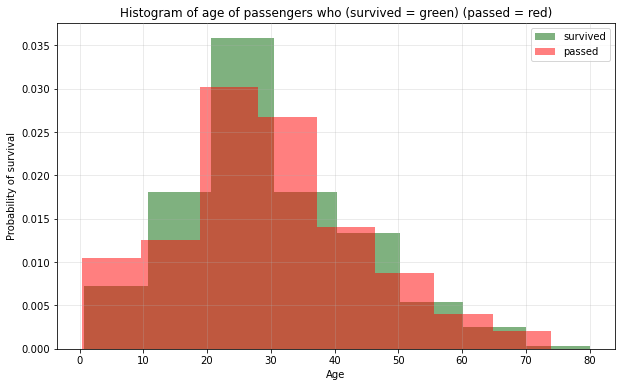

In [11]:
#histogram of age of pasengers
fig, axes = plt.subplots(1,1, figsize = (10,6))
#survivor histogram
dfTitanic.loc[dfTitanic['Survived'] == 1].hist(column = 'Age', ax = axes, facecolor = "darkgreen", density = True, alpha = .5, bins = 8)
#passed histogram
dfTitanic.loc[dfTitanic['Survived'] == 0].hist(column = 'Age', ax = axes, facecolor = "red", density = True, alpha = .5, bins = 8)
axes.set_title("Histogram of age of passengers who (survived = green) (passed = red)")
axes.set_xlabel("Age")
axes.set_ylabel("Probability of survival")
axes.legend(['survived', 'passed'])
axes.grid(alpha = .3)
axes.set_axisbelow(False)

**Part F:** In Part E, we plotted two *density* histograms, showing the distributions of ages of passengers that survived or did not survive the Titanic disaster. Why would it be misleading for us to have plotted these as *frequency* histograms instead?

**Answer**

Since there were more men than women on the titanic, a frequency histogram would skew the graph into looking like more men survived. When in reality, each histogram has to be out of the total number of each sex to get a proportion.

**Part G**: Do the data suggest class warfare, male chivalry, age bias, or some combination of these characteristics in the final hours aboard the Titanic?  Justify your conclusions based on the computations done above, or do any other analysis that you like, but be sure to clearly justify your conclusions.

**Answer**

There are several biases present in these data. The first is that regardless of class, men had a lower chance of survival, suggesting male chivalry. The second is that regardless of sex, higher classes had a higher chance of survival, implying class warfare. Finally, the histograms above has a center around ages 20-35, suggesting that the old and young were neglegted to be put on lifeboats.

**Part H**: In lecture we described some types of sampling from a *sample frame*.  Perform the following operations:

1) Since the overall ship had around 65% men, create a *sample* of distinct passengers from the overall ship that consists of exactly 13 randomly chosen men and 7 randomly chosen women.  Report the proportion of those passengers that survived.

2) Repeat the sampling process from part 1) 1000 times.  Report the **mean** survival proportion of those 1000 samples.  Is this close to the survival rate in part A?  Why or why not?

3) Make a histogram of the 1000 sample means from parth H2.  Include an indicator of the mean your computed in H2 on the histogram.

4) What is the name for this sort of sample?


The number of men who survived in a sample of 13 passengers was 1
The number of women who survived in a sample of 7 passengers was 3
The total number of men and women who survived in a sample of 20 passengers was 4
The number of men who survived in 1000 samples of 13 passengers was 2.573
The number of women who survived in 1000 samples of 7 passengers was 5.183


Text(0.5, 1.0, 'Average mean of probability of surviving in 1000 samples of 7 women and 13 men')

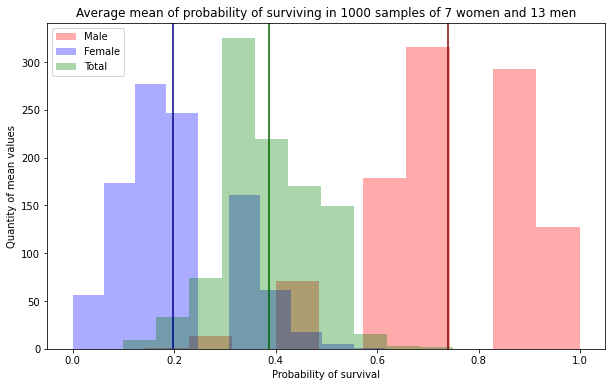

In [12]:
#gather sample of 13 males and 7 females
sampleMale = dfTitanic.loc[dfTitanic['Sex'] == 'male'].sample(n = 13)
sampleFemale = dfTitanic.loc[dfTitanic['Sex'] == 'female'].sample(n = 7)
#of that sample, sum up the survivors
menSurv = np.sum(sampleMale['Survived'])
womenSurv = np.sum(sampleFemale['Survived'])
totalSurv = menSurv + womenSurv

#final print statement
print("The number of men who survived in a sample of 13 passengers was {}".format(menSurv))
print("The number of women who survived in a sample of 7 passengers was {}".format(womenSurv))
print("The total number of men and women who survived in a sample of 20 passengers was {}".format(totalSurv))

i = 0
totalLoopMen = 0
totalLoopWomen = 0
totalLoopTotal = 0
#empty list for histogram later
totalMLoopHist = []
totalFLoopHist = []
totalLoopHist = []

#1000 iteration loop of part 1
while i < 1000:
    #part 1 again
    sampleMaleLoop = dfTitanic.loc[dfTitanic['Sex'] == 'male'].sample(n = 13)
    sampleFemaleLoop = dfTitanic.loc[dfTitanic['Sex'] == 'female'].sample(n = 7)
    menSurvLoop = np.sum(sampleMaleLoop['Survived'])
    womenSurvLoop = np.sum(sampleFemaleLoop['Survived'])
    totalSurvLoop = menSurvLoop + womenSurvLoop
    #store and add up to a total
    totalLoopMen = totalLoopMen + menSurvLoop
    totalLoopWomen = totalLoopWomen + womenSurvLoop
    totalLoopTotal = totalLoopTotal + totalSurvLoop
    #add the total to the empty list and divide by the sample size
    totalFLoopHist.append(womenSurvLoop / 7)
    totalMLoopHist.append(menSurvLoop / 13)
    totalLoopHist.append(totalSurvLoop / 20)
    i = i + 1
finalMeanMen = totalLoopMen / 1000
finalMeanWomen = totalLoopWomen / 1000
finalMeanTotal = totalLoopTotal /1000
#final print statement
print("The number of men who survived in 1000 samples of 13 passengers was {}".format(finalMeanMen))
print("The number of women who survived in 1000 samples of 7 passengers was {}".format(finalMeanWomen))

#histogram for probability of survival from 1000 samples
fig, ax = plt.subplots(1,1, figsize = (10,6))
ax.hist(totalFLoopHist, facecolor = 'red', alpha = .33, bins = 10, label = "Male")
ax.hist(totalMLoopHist, facecolor = 'blue', alpha = .33, bins = 10, label = "Female")
ax.hist(totalLoopHist, facecolor = 'green', alpha = .33, bins = 10, label = "Total")
#plotting a line of the average mean from part 2.
plt.axvline(finalMeanMen/13, color = 'darkblue')
plt.axvline(finalMeanWomen/7, color = 'darkred')
plt.axvline(finalMeanTotal/20, color = 'darkgreen')
ax.set_xlabel("Probability of survival")
ax.set_ylabel("Quantity of mean values")
ax.legend()
ax.set_title('Average mean of probability of surviving in 1000 samples of 7 women and 13 men')

**Part H4 Answer**

This is a stratified sample, because the data has been seperated into two seperate catagories (sex) and sampled by subgroup. 